In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('cleaned_data.csv')
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,days,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,3463,64
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,2617,67
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,2964,56
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,2557,37
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,2813,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Graduation,Married,34421.0,1,0,81,3,3,7,6,...,0,0,0,0,0,3,11,0,3190,47
1944,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,3,11,0,2553,75
1945,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,1,0,0,0,0,3,11,0,2807,40
1946,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,3,11,0,2808,65


In [68]:
feed = df.drop(['Education','Marital_Status'],axis=1)

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [70]:
scaler = MinMaxScaler()

In [71]:
feed = scaler.fit_transform(feed)

In [72]:
wcss = []
for i in range(1,10):
    k_mean = KMeans(n_clusters=i)
    k_mean.fit_predict(feed)
    wcss.append(k_mean.inertia_)

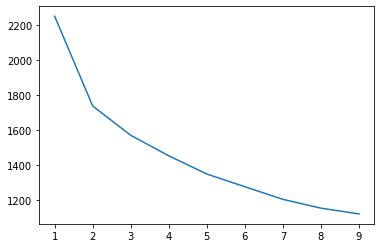

In [73]:
plt.plot(range(1,10),wcss)

In [90]:
k_mean = KMeans(n_clusters=2,random_state=42,max_iter=700)

In [91]:
feed = pd.DataFrame(feed)
feed

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.562729,0.0,0.0,0.585859,0.482890,0.619718,0.667482,0.934783,0.656716,0.488889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.913452,0.378641
1,0.445072,0.5,0.5,0.383838,0.008365,0.007042,0.007335,0.010870,0.007463,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117592,0.407767
2,0.697157,0.0,0.0,0.262626,0.323954,0.345070,0.155257,0.603261,0.156716,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444026,0.300971
3,0.248563,0.5,0.0,0.262626,0.008365,0.028169,0.024450,0.054348,0.022388,0.027778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061148,0.116505
4,0.564276,0.5,0.0,0.949495,0.131559,0.302817,0.144254,0.250000,0.201493,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301976,0.145631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,0.326127,0.5,0.0,0.818182,0.002281,0.021127,0.008557,0.032609,0.014925,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656632,0.213592
1944,0.621349,1.0,0.5,0.565657,0.308745,0.000000,0.036675,0.000000,0.000000,0.044444,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.057385,0.485437
1945,0.551187,0.0,0.0,0.919192,0.690494,0.338028,0.265281,0.173913,0.089552,0.133333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296331,0.145631
1946,0.673534,0.0,0.5,0.080808,0.325475,0.211268,0.261614,0.434783,0.223881,0.338889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297272,0.388350


In [92]:
df['category']= k_mean.fit_predict(feed)

In [93]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,days,Age,category
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,3463,64,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,2617,67,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,2964,56,1
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,2557,37,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,2813,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Graduation,Married,34421.0,1,0,81,3,3,7,6,...,0,0,0,0,3,11,0,3190,47,0
1944,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,3,11,0,2553,75,0
1945,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,3,11,0,2807,40,1
1946,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,3,11,0,2808,65,1


In [94]:
u_labels=df['category'].unique()
u_labels

a =0
col_ind = []
for i in df.columns:
    print(i,a)
    col_ind.append(a)
    a += 1
col_ind

Education 0
Marital_Status 1
Income 2
Kidhome 3
Teenhome 4
Recency 5
MntWines 6
MntFruits 7
MntMeatProducts 8
MntFishProducts 9
MntSweetProducts 10
MntGoldProds 11
NumDealsPurchases 12
NumWebPurchases 13
NumCatalogPurchases 14
NumStorePurchases 15
NumWebVisitsMonth 16
AcceptedCmp3 17
AcceptedCmp4 18
AcceptedCmp5 19
AcceptedCmp1 20
AcceptedCmp2 21
Complain 22
Z_CostContact 23
Z_Revenue 24
Response 25
days 26
Age 27
category 28


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

1 (752, 29)
0 (1196, 29)


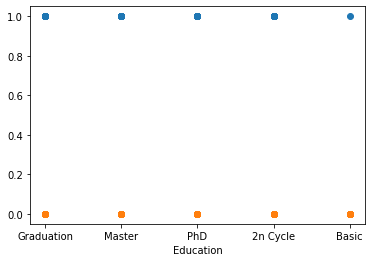

1 (752, 29)
0 (1196, 29)


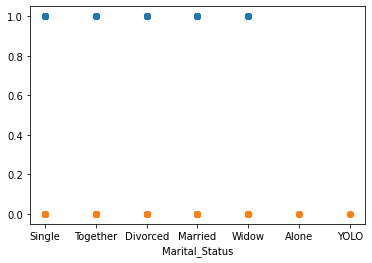

1 (752, 29)
0 (1196, 29)


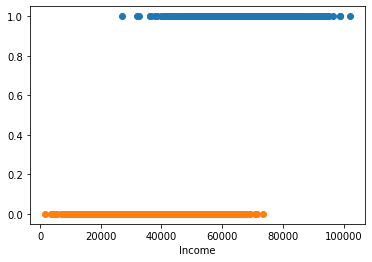

1 (752, 29)
0 (1196, 29)


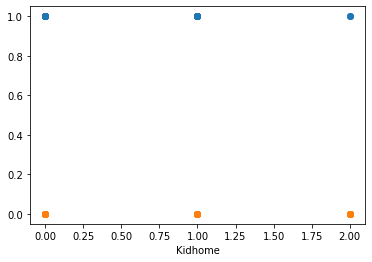

1 (752, 29)
0 (1196, 29)


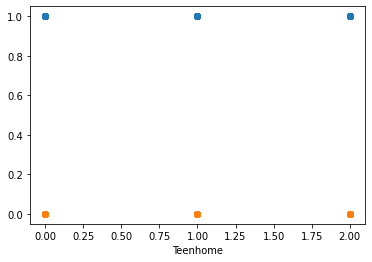

1 (752, 29)
0 (1196, 29)


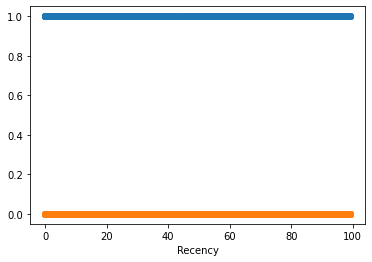

1 (752, 29)
0 (1196, 29)


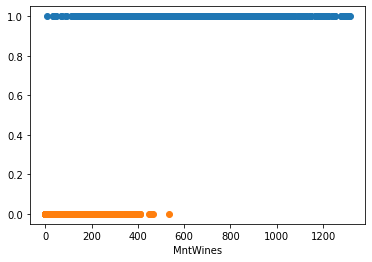

1 (752, 29)
0 (1196, 29)


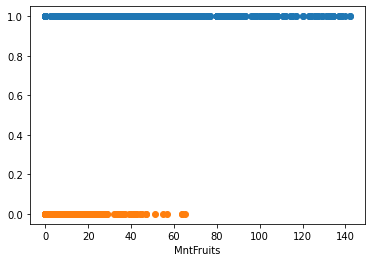

1 (752, 29)
0 (1196, 29)


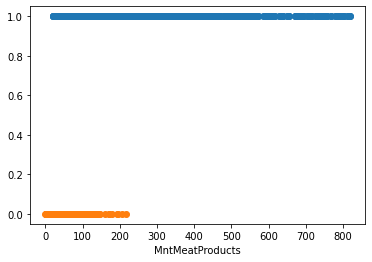

1 (752, 29)
0 (1196, 29)


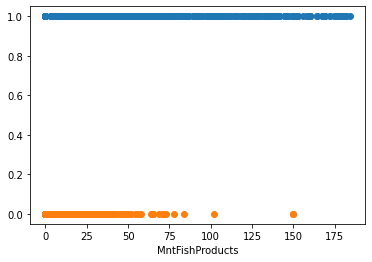

1 (752, 29)
0 (1196, 29)


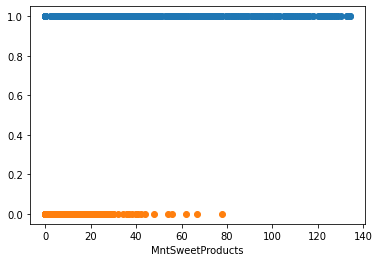

1 (752, 29)
0 (1196, 29)


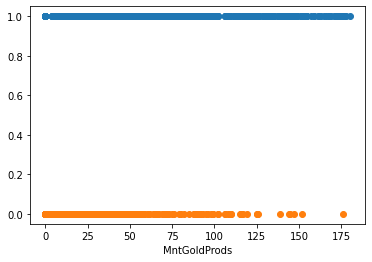

1 (752, 29)
0 (1196, 29)


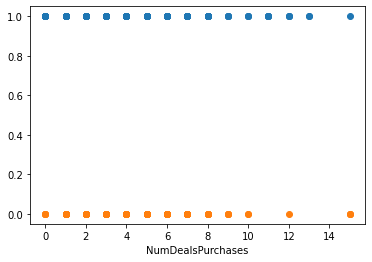

1 (752, 29)
0 (1196, 29)


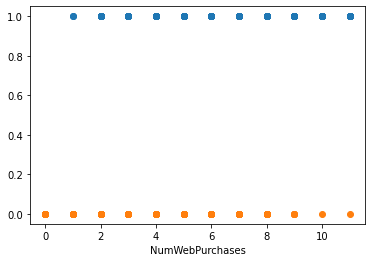

1 (752, 29)
0 (1196, 29)


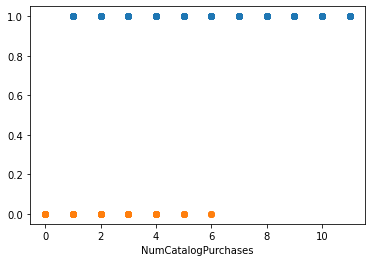

1 (752, 29)
0 (1196, 29)


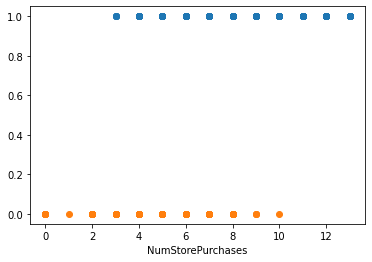

1 (752, 29)
0 (1196, 29)


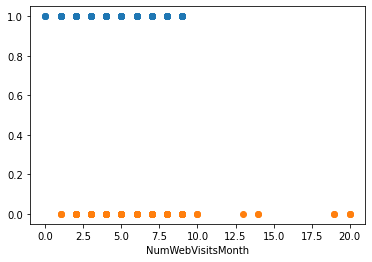

1 (752, 29)
0 (1196, 29)


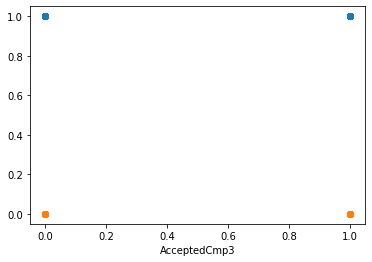

1 (752, 29)
0 (1196, 29)


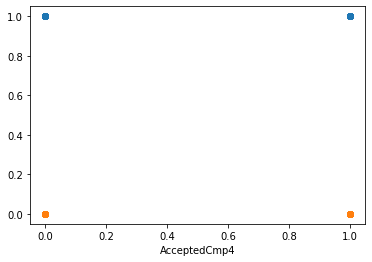

1 (752, 29)
0 (1196, 29)


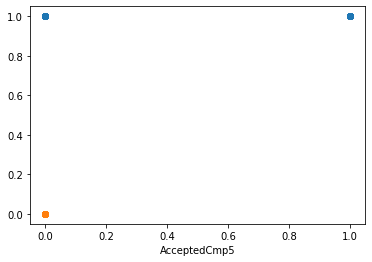

1 (752, 29)
0 (1196, 29)


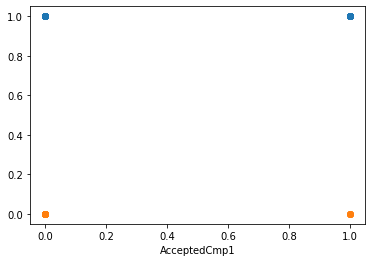

1 (752, 29)
0 (1196, 29)


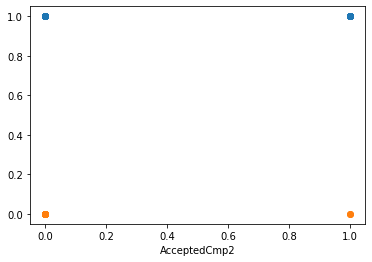

1 (752, 29)
0 (1196, 29)


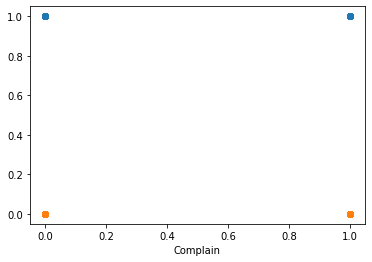

1 (752, 29)
0 (1196, 29)


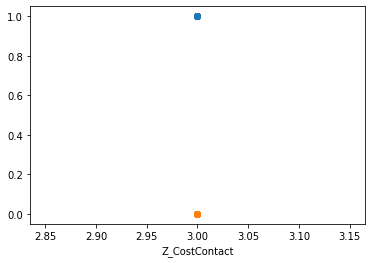

1 (752, 29)
0 (1196, 29)


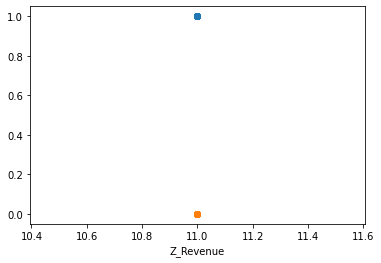

1 (752, 29)
0 (1196, 29)


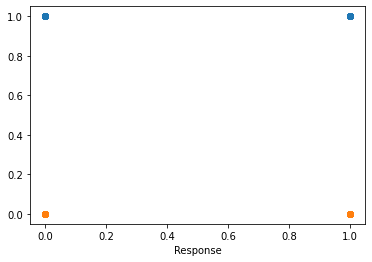

1 (752, 29)
0 (1196, 29)


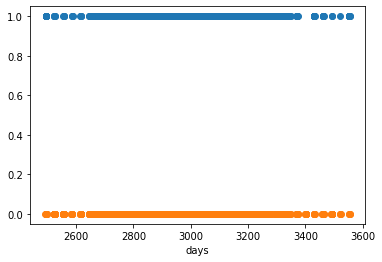

1 (752, 29)
0 (1196, 29)


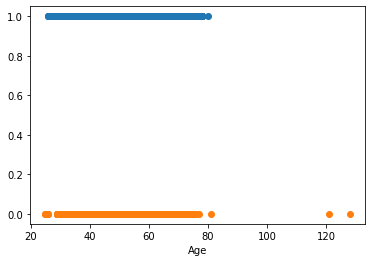

1 (752, 29)
0 (1196, 29)


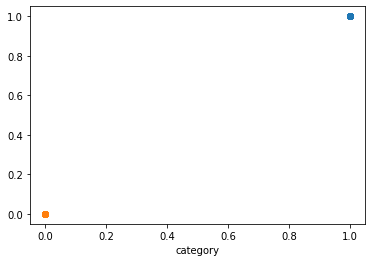

In [95]:
for j in col_ind:
    for i in u_labels:
        plt.scatter(df[df['category']==i].iloc[:,j] , df[df['category']==i].iloc[:,28] , label = i)
        print(i,df[df['category']==i].shape)
    plt.xlabel(df.columns[j])
    plt.show()

In [96]:
a =0
col_ind = []
for i in df.columns:
    print(i,a)
    col_ind.append(a)
    a += 1

Education 0
Marital_Status 1
Income 2
Kidhome 3
Teenhome 4
Recency 5
MntWines 6
MntFruits 7
MntMeatProducts 8
MntFishProducts 9
MntSweetProducts 10
MntGoldProds 11
NumDealsPurchases 12
NumWebPurchases 13
NumCatalogPurchases 14
NumStorePurchases 15
NumWebVisitsMonth 16
AcceptedCmp3 17
AcceptedCmp4 18
AcceptedCmp5 19
AcceptedCmp1 20
AcceptedCmp2 21
Complain 22
Z_CostContact 23
Z_Revenue 24
Response 25
days 26
Age 27
category 28


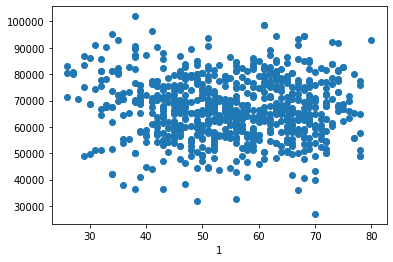

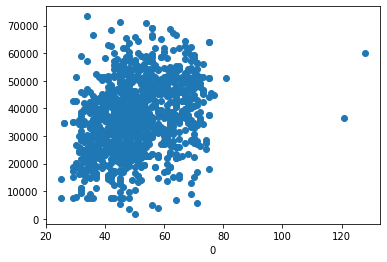

In [97]:
feature_1,feature_2 = 27,2
for i in u_labels:
    plt.scatter(df[df['category']==i].iloc[:,feature_1] , df[df['category']==i].iloc[:,feature_2],label = i)
    plt.xlabel(i)
    plt.show()

In [98]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [99]:
sil_score = silhouette_score(feed,df['category'])
sil_score

0.2629832945754617

In [52]:
feed.drop(['category'],axis=1,inplace=True)

In [85]:
feed

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.562729,0.0,0.0,0.585859,0.482890,0.619718,0.667482,0.934783,0.656716,0.488889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.913452,0.378641
1,0.445072,0.5,0.5,0.383838,0.008365,0.007042,0.007335,0.010870,0.007463,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117592,0.407767
2,0.697157,0.0,0.0,0.262626,0.323954,0.345070,0.155257,0.603261,0.156716,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444026,0.300971
3,0.248563,0.5,0.0,0.262626,0.008365,0.028169,0.024450,0.054348,0.022388,0.027778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061148,0.116505
4,0.564276,0.5,0.0,0.949495,0.131559,0.302817,0.144254,0.250000,0.201493,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301976,0.145631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,0.326127,0.5,0.0,0.818182,0.002281,0.021127,0.008557,0.032609,0.014925,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656632,0.213592
1944,0.621349,1.0,0.5,0.565657,0.308745,0.000000,0.036675,0.000000,0.000000,0.044444,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.057385,0.485437
1945,0.551187,0.0,0.0,0.919192,0.690494,0.338028,0.265281,0.173913,0.089552,0.133333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296331,0.145631
1946,0.673534,0.0,0.5,0.080808,0.325475,0.211268,0.261614,0.434783,0.223881,0.338889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297272,0.388350


In [86]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,days,Age,category
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,3463,64,3
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,2617,67,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,2964,56,1
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,2557,37,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,2813,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Graduation,Married,34421.0,1,0,81,3,3,7,6,...,0,0,0,0,3,11,0,3190,47,0
1944,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,3,11,0,2553,75,0
1945,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,3,11,0,2807,40,1
1946,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,3,11,0,2808,65,1


Education 0
Marital_Status 1
Income 2
Kidhome 3
Teenhome 4
Recency 5
MntWines 6
MntFruits 7
MntMeatProducts 8
MntFishProducts 9
MntSweetProducts 10
MntGoldProds 11
NumDealsPurchases 12
NumWebPurchases 13
NumCatalogPurchases 14
NumStorePurchases 15
NumWebVisitsMonth 16
AcceptedCmp3 17
AcceptedCmp4 18
AcceptedCmp5 19
AcceptedCmp1 20
AcceptedCmp2 21
Complain 22
Z_CostContact 23
Z_Revenue 24
Response 25
days 26
Age 27
category 28

For n_clusters = 2 The average silhouette_score is : 0.2629832945754617
For n_clusters = 3 The average silhouette_score is : 0.2451077201143532
For n_clusters = 4 The average silhouette_score is : 0.24758417624294865
For n_clusters = 5 The average silhouette_score is : 0.19935640501463958
For n_clusters = 6 The average silhouette_score is : 0.13662555276783253
For n_clusters = 7 The average silhouette_score is : 0.14674289713648667
For n_clusters = 8 The average silhouette_score is : 0.15225292413671965
For n_clusters = 9 The average silhouette_score is : 0.1564739434688122


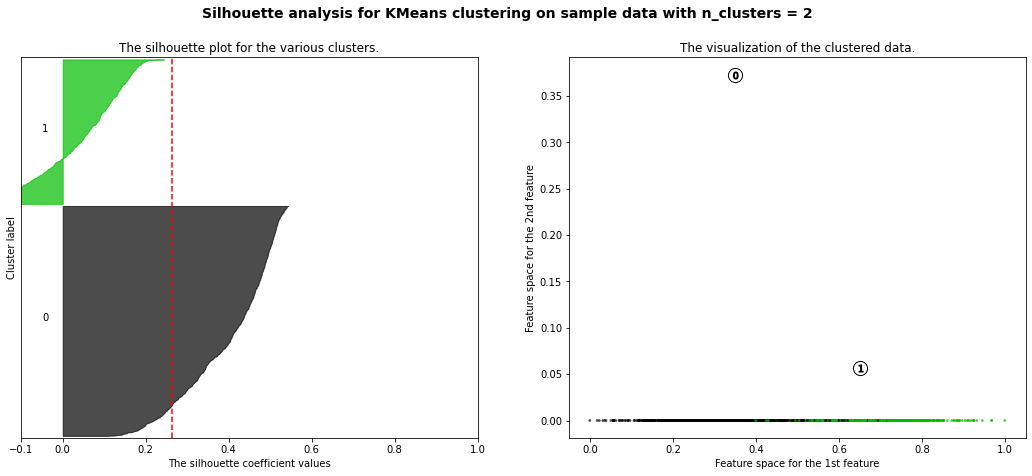

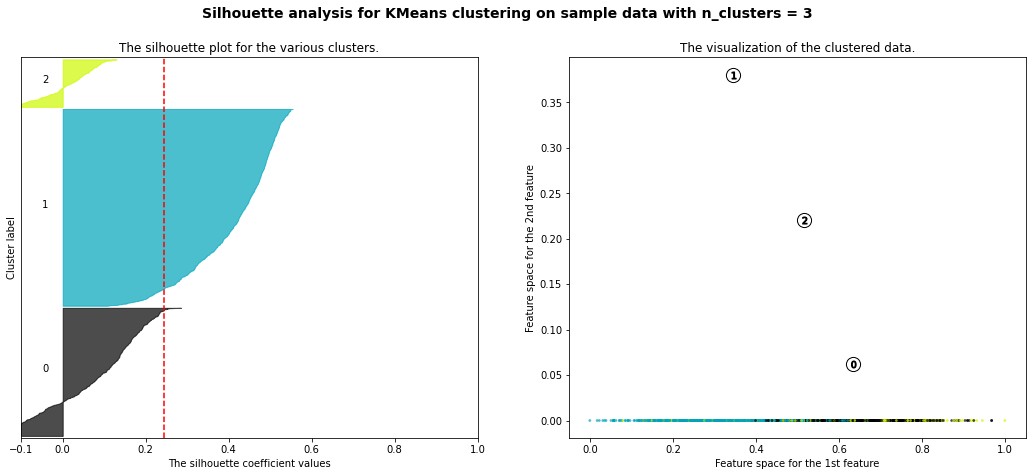

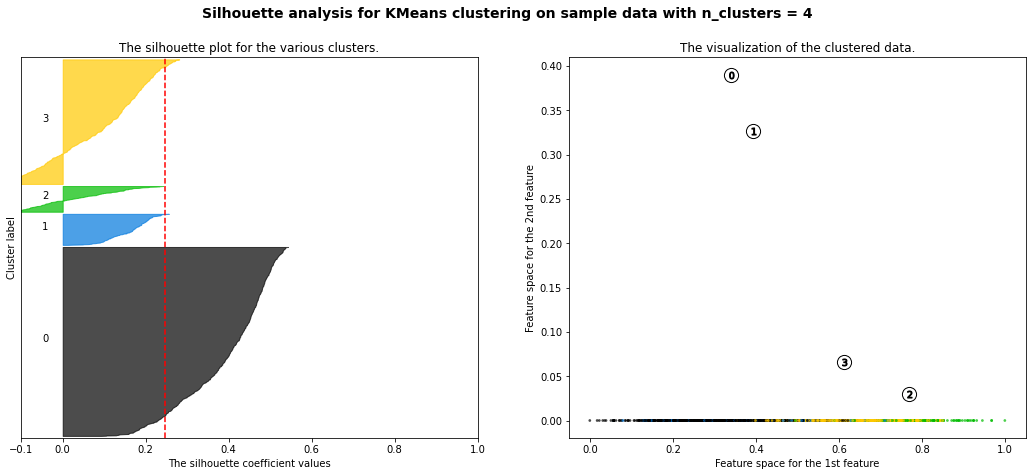

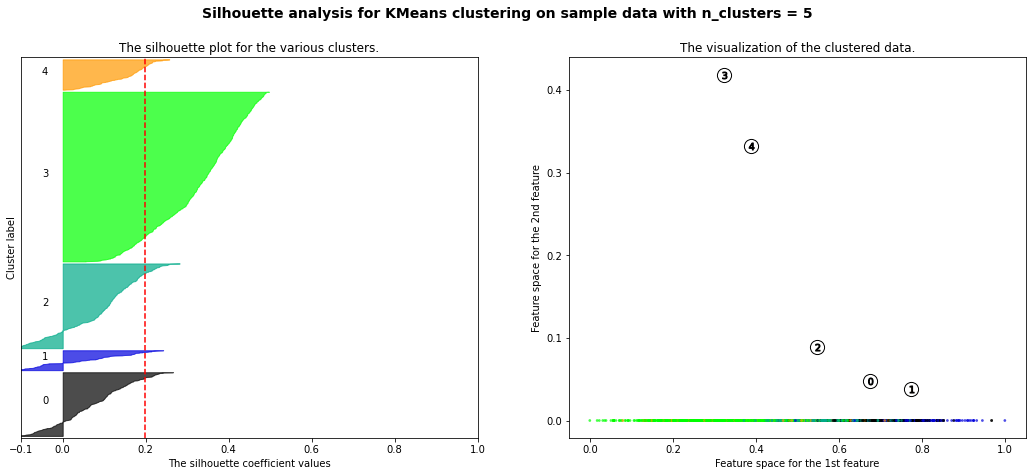

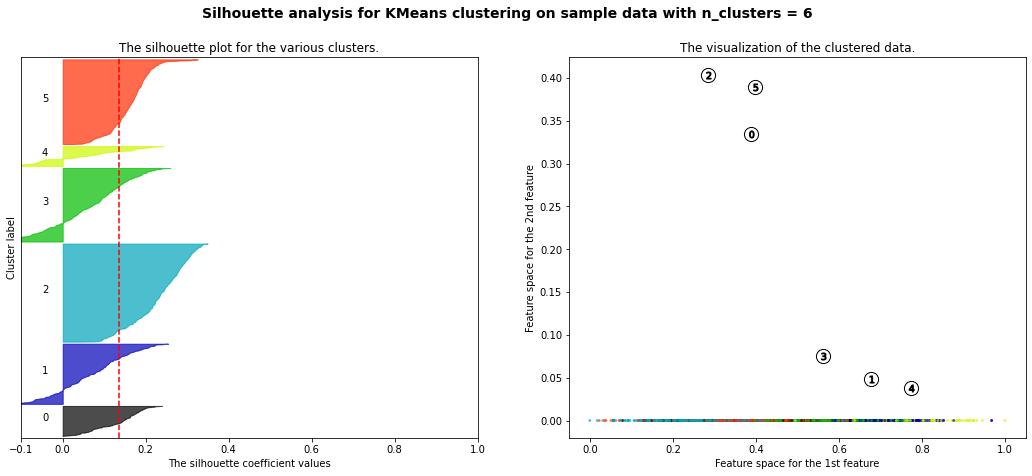

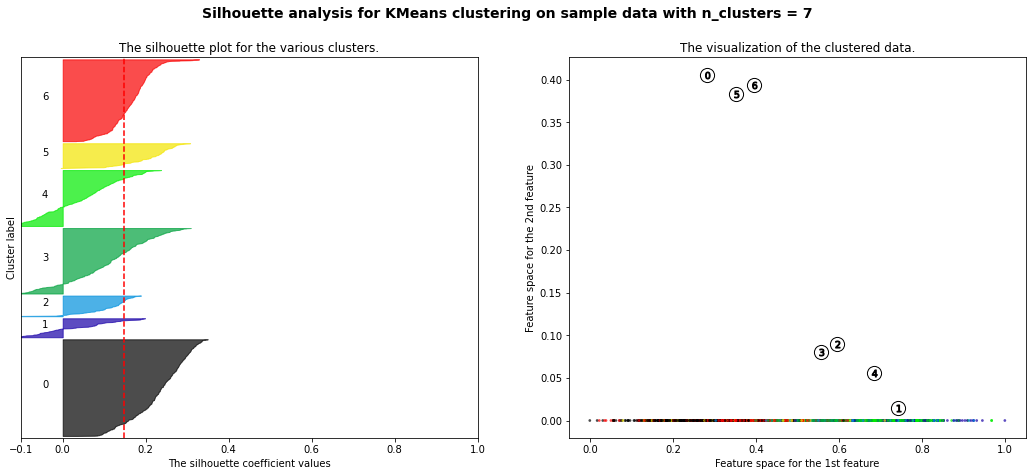

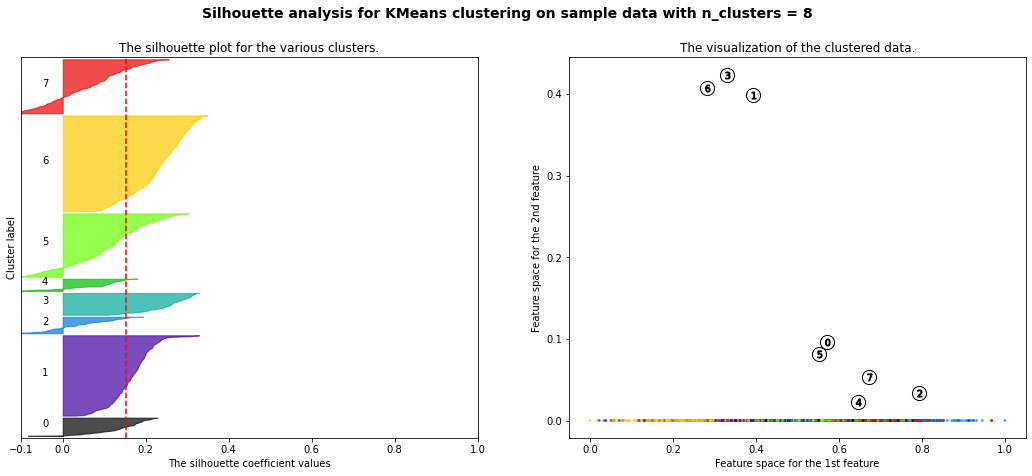

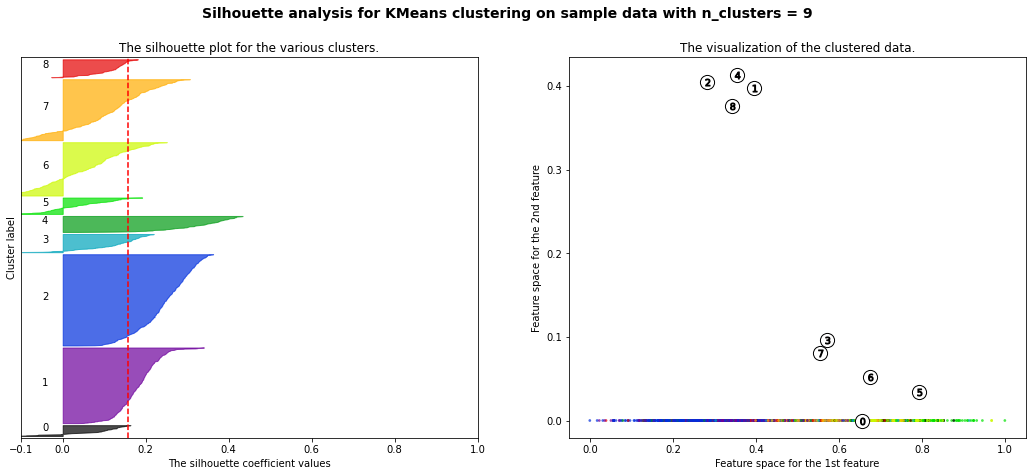

In [101]:
import matplotlib.cm as cm

for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(feed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=700)
    cluster_labels = clusterer.fit_predict(feed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(feed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(feed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(feed.iloc[:, 0], feed.iloc[:, 22], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()